# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/DL%20Spring%202023/Module%204-%20Deep%20Neural%20Networks/DNN_python/Module%204-%20DNN%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 6- Deep Neural Networks with Tensorflow and Keras

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow first: https://www.tensorflow.org/install


In [1]:
import tensorflow 
tensorflow.__version__

'2.10.1'

# Preparing the data

## Importing Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("employee.csv")
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


For a classification problem, it is always good to start to check if the target is balanced or not!

In [4]:
dataset['left'].value_counts()/len(dataset)

left
0    0.761917
1    0.238083
Name: count, dtype: float64

This data set is not that bad! (not very unbalanced). If anything, your accuracy must be greater that 76%. Why?

In [5]:
dataset.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
department                10
salary                     3
left                       2
dtype: int64

In [6]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [7]:
categoricals = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [8]:
for col in categoricals:
    dataset[col]= dataset[col].astype("category")

dataset.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   promotion_last_5years  14999 non-null  category
 7   department             14999 non-null  category
 8   salary                 14999 non-null  category
 9   left                   14999 non-null  int64   
dtypes: category(4), float64(2), int64(4)
memory usage: 762.5 KB


In [9]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000


In [10]:
# We need to one-hot encode all the categorical variables. 
dataset = pd.get_dummies(dataset, drop_first=True)

In [11]:
df = dataset.copy()

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,False,False,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,1,False,False,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,1,False,False,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,1,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,1,False,False,False,False,False,False,False,False,True,False,False,True,False


In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left', 'Work_accident_1',
       'promotion_last_5years_1', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [14]:
df.shape

(14999, 19)

## Train-Test split
We are going to use sklearn train_test_split function which is really easy to work with. 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop("left", axis=1, inplace=False).values # tensorflow works with np.array instead of pandas series or dataframe. So we had to add the .value to the end. 
X

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [17]:
X.shape

(14999, 18)

In [18]:
y = df['left'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=500)

In [20]:
X_train.shape

(11999, 18)

In [21]:
y_test.shape

(3000,)

## Scaling features
To avoid gradient vanishing or exploding, we should normalize the features:

It depends on the problem and the data. Both MinMaxScaler and StandardScaler are techniques used to normalize data in a preprocessing step, but they have different objectives.
MinMaxScaler scales the data between a specified minimum and maximum value (usually 0 and 1). It is often used for problems that have a defined range for the input features, such as image data.
StandardScaler, on the other hand, scales the data to have a mean of 0 and a standard deviation of 1. This makes it useful for Gaussian-distributed data, where the mean and standard deviation are meaningful statistics.
In deep learning, the choice of normalization technique often depends on the distribution of the input data. If the data is Gaussian-distributed, StandardScaler may be a better choice. If the data has a well-defined range, MinMaxScaler may be more appropriate. Ultimately, it is important to experiment with different normalization techniques and see which one works best for a specific problem.

In [22]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
# remember we scale the features using the train set to avoid data leakage to the test set. 
X_train= scaler.fit_transform(X_train)

X_test  = scaler.transform(X_test )

In [25]:
X_train

array([[ 0.42457559, -0.79730715,  0.16300478, ..., -0.47277248,
         1.01672455, -0.86434249],
       [-2.06204425,  0.60345986,  1.78817666, ..., -0.47277248,
         1.01672455, -0.86434249],
       [-0.13691922,  0.72019044,  0.16300478, ..., -0.47277248,
         1.01672455, -0.86434249],
       ...,
       [ 0.90585684, -1.38096007, -0.64958116, ..., -0.47277248,
        -0.98355056,  1.15694879],
       [-2.06204425,  0.72019044,  1.78817666, ..., -0.47277248,
         1.01672455, -0.86434249],
       [-1.01926819, -1.1474989 , -1.4621671 , ...,  2.11518234,
         1.01672455, -0.86434249]])

# Tensorflow imports

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
help(keras.Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

# Creating a NN model:

There are 3 ways of creating a model with Keras:
1. Sequential class (easiest and least flexible)
2. Functional API (LEGO style and more flexible)
3. Subclassing API (Fully customized and most advance)

In this course we will start with the Sequential class and for more advanced topics we will go over the functional api version. We will NOT cover the Subclassing API which is beyond the scope of this course. 

## 1. Sequential class

We can do either create a model as a **list of layers** or as **adding layers one by one**. The second approach is more preferred as it is a little more flexible. 

In [28]:
from tensorflow.keras import layers
from tensorflow import keras

In [29]:
X_train.shape

(11999, 18)

In [39]:
# List of layers
model_ll = keras.Sequential([
    layers.Dense(units = 20, activation = 'relu'),
    layers.Dense(units = 8, activation = 'relu'),
    
    # output layer 
    layers.Dense(units = 1 , activation = 'sigmoid')
])

Models that are not built have no weights or summary. So we need to build the model first

In [40]:
model_ll.build(input_shape=(None, X_train.shape[1])) # This is the shape of data

In [41]:
model_ll.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                380       
                                                                 
 dense_10 (Dense)            (None, 8)                 168       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [42]:
18 * 20 + 20

380

In [43]:
20 * 8 + 8 

168

In [44]:
8 *1 + 1 

9

Now let's add layers one by one and built the model on the fly. We also rename the layers and the model itself.

In [45]:
# adding layers one by one
model = keras.Sequential(name="my_classification_model")
model.add(layers.Input(shape=(X_train.shape[1], ))) # this is the shape of each sample! 
model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))

#output layer
model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))


In [46]:
model.summary()

Model: "my_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [47]:
18*20+20 # first layer parameters

380

In [48]:
20*8+8 # second layer parameters

168

In [49]:
model.weights

[<tf.Variable 'first_layer/kernel:0' shape=(18, 20) dtype=float32, numpy=
 array([[-0.3971259 ,  0.15164694, -0.09917215, -0.25930664,  0.17766592,
         -0.14940599, -0.25615433, -0.35990193, -0.01177564, -0.30588567,
          0.32689354, -0.02284834,  0.3885719 , -0.06482974, -0.1523079 ,
         -0.23073718, -0.02714762,  0.0153318 , -0.09280708, -0.03474212],
        [-0.2950269 , -0.39619574, -0.13644043,  0.12274352,  0.17950764,
          0.04293543, -0.26365766, -0.14501357,  0.38974836,  0.12562594,
         -0.15146957,  0.1511915 , -0.29830447,  0.36057875,  0.10570469,
         -0.27123764, -0.20891732, -0.3619569 , -0.38184607, -0.14800236],
        [-0.38816482,  0.2737061 ,  0.11745194,  0.0996576 , -0.05572268,
          0.31734565,  0.27833173,  0.10659108,  0.14091983, -0.36597246,
          0.03394166, -0.23451154,  0.35001394,  0.15013888, -0.34663832,
         -0.02157968, -0.08819932,  0.0014945 ,  0.2722557 ,  0.1285117 ],
        [-0.35171098, -0.02198592, 

## 2. Functional API
The sequential model is easy to use, but its applicability is extremely limited. It can only express models with a single input and a single output. In practice, we will deal with models with multiple input (image with its meta data) and multiple output. This is like LEGO

In [50]:
X_train.shape[1]

18

In [51]:
inputs   = keras.Input(shape=(X_train.shape[1]), name= "my_input")
features = layers.Dense(20, activation='relu',   name='first_layer')(inputs)
features = layers.Dense(8, activation='relu',   name='second_layer')(features)
outputs   = layers.Dense(1,  activation='sigmoid',name='output_layer')(features)
model_functional = keras.Model(inputs=inputs, outputs=outputs)



In [52]:
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 18)]              0         
                                                                 
 first_layer (Dense)         (None, 20)                380       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [58]:
keras.utils.plot_model(model_functional, "ticket_classifier.png" , 
                       show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


One of the power of functional api is access to the inputs and outputs of different layers. For example, let's add another output layer without re-creating the entire model

In [56]:
model_functional.layers

In [59]:
features = model_functional.layers[2].output
new_output = layers.Dense(3, activation='softmax',   name='new_output_layer')(features)

new_model_functional = keras.Model(inputs=inputs, outputs=[outputs, new_output])

In [60]:
new_model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 my_input (InputLayer)          [(None, 18)]         0           []                               
                                                                                                  
 first_layer (Dense)            (None, 20)           380         ['my_input[0][0]']               
                                                                                                  
 second_layer (Dense)           (None, 8)            168         ['first_layer[0][0]']            
                                                                                                  
 output_layer (Dense)           (None, 1)            9           ['second_layer[0][0]']           
                                                                                            

In [61]:
8 * 3 + 3

27

For the rest of this notebook, we will work with the "model" model. The sequential one with adding one layer at a time.

In [62]:
model.summary()

Model: "my_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


# Model Compile

Now it is time to choose the optimizer and the loss function. We will also pick our performance metric as well. 

keras optimizers: https://keras.io/api/optimizers/

keras loss functions: https://keras.io/api/losses/

keras metrics: https://keras.io/api/metrics/

    # For a multi-class classification problem (one-hot encoded output)
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.Accuracy()])

    # For a multi-class classification problem (integer output)
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse', 
                  metrics=['mean_squared_error']) # we don't need to pass the metrics for regression.

In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# let's make a function to create the model. This is an important step, because 
# every time you want to fit (train) a new model, you don't want to retrain it on the existing one! 
def build_model():
    model = keras.Sequential(name="my_classification_model")
    model.add(layers.Input(shape=(X_train.shape[1],))) # this is the shape of each sample! 
    model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
    model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))

    #output layer
    model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [68]:
model = build_model()
model.summary()

Model: "my_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


# Model fit
This is the training part! 


In [69]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128)

Epoch 1/400
94/94 [==============================] - 1s 4ms/step - loss: 0.5027 - accuracy: 0.7656 - val_loss: 0.4485 - val_accuracy: 0.7727
Epoch 2/400
94/94 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8271 - val_loss: 0.3594 - val_accuracy: 0.8423
Epoch 3/400
94/94 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8744 - val_loss: 0.2914 - val_accuracy: 0.8880
Epoch 4/400
94/94 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9103 - val_loss: 0.2388 - val_accuracy: 0.9203
Epoch 5/400
94/94 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9311 - val_loss: 0.2077 - val_accuracy: 0.9340
Epoch 6/400
94/94 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9389 - val_loss: 0.1918 - val_accuracy: 0.9423
Epoch 7/400
94/94 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9427 - val_loss: 0.1829 - val_accuracy: 0.9447
Epoch 8/400
9

# Model Evaluation

In [74]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
395,0.074140,0.976498,0.122080,0.965667
396,0.074278,0.976998,0.125612,0.964000
397,0.073939,0.977165,0.125201,0.962333
398,0.074091,0.976915,0.125086,0.963000
399,0.073783,0.977165,0.126362,0.963667


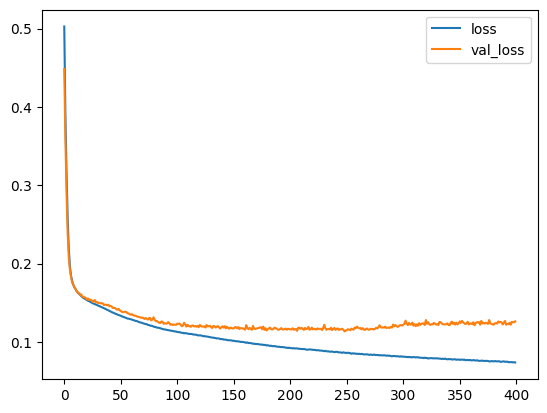

In [76]:
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

As you can see, the model is overfitting! we can either use early stopping (preferred here) or drop out regularization. 

# Regularization

## 1. Early stopping!
we didn't need to run through all the epochs! at some point, the val_loss is not improving. Let's fix this by introducing **callbacks**!

The keras.callbacks module includes a number of built-in callbacks including 
1. ModelCheckpoint and 
2. EarlyStopping. 

EarlyStopping is typically used in combination with ModelCheckpoint, which lets you continually save the model during
training (and, optionally, save only the current best model so far: the version of the model that achieved the best performance at the end of an epoch).



In [77]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [80]:
early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint.keras")
callback_list    = [early_stopping,model_checkpoint]

In [81]:
model = build_model()
model.summary()

Model: "my_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128, 
          callbacks=callback_list)

Epoch 1/400
94/94 [==============================] - 1s 4ms/step - loss: 0.5892 - accuracy: 0.6827 - val_loss: 0.4685 - val_accuracy: 0.7857
Epoch 2/400
94/94 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8064 - val_loss: 0.3595 - val_accuracy: 0.8293
Epoch 3/400
94/94 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8807 - val_loss: 0.2749 - val_accuracy: 0.8897
Epoch 4/400
94/94 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9130 - val_loss: 0.2281 - val_accuracy: 0.9150
Epoch 5/400
94/94 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9291 - val_loss: 0.2024 - val_accuracy: 0.9323
Epoch 6/400
94/94 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9362 - val_loss: 0.1879 - val_accuracy: 0.9407
Epoch 7/400
94/94 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9427 - val_loss: 0.1788 - val_accuracy: 0.9440
Epoch 8/400
9

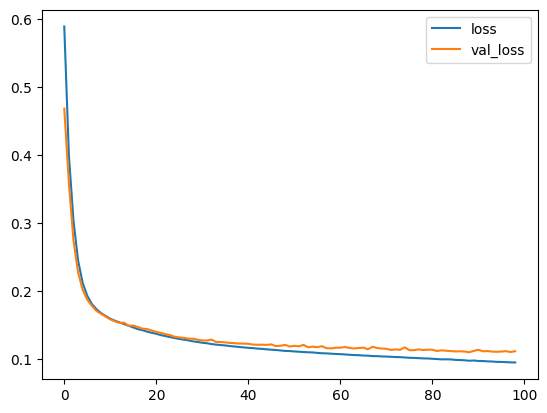

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## 2. Drop out

Let's make a new model and add the drop out layer to that! 

In [84]:
def build_model_with_dropout():
    model = keras.Sequential(name="my_classification_model_with_Dropout")
    model.add(layers.Input(shape=(X_train.shape[1],))) # this is the shape of each sample! 
    model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
    model.add(layers.Dropout(rate=0.5)) # 50% of nuerons will be randomly dropped out. 
    
    model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))
    model.add(layers.Dropout(rate=0.5))
    
    #output layer
    model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [85]:
model_with_dropout = build_model_with_dropout()
model_with_dropout.summary()

Model: "my_classification_model_with_Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [86]:
model_with_dropout.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128, 
          callbacks=callback_list)

Epoch 1/400
94/94 [==============================] - 1s 4ms/step - loss: 0.6752 - accuracy: 0.6172 - val_loss: 0.5849 - val_accuracy: 0.7580
Epoch 2/400
94/94 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7489 - val_loss: 0.5223 - val_accuracy: 0.7580
Epoch 3/400
94/94 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7611 - val_loss: 0.4904 - val_accuracy: 0.7580
Epoch 4/400
94/94 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7647 - val_loss: 0.4577 - val_accuracy: 0.7580
Epoch 5/400
94/94 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7690 - val_loss: 0.4198 - val_accuracy: 0.7583
Epoch 6/400
94/94 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7785 - val_loss: 0.3868 - val_accuracy: 0.7807
Epoch 7/400
94/94 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7892 - val_loss: 0.3597 - val_accuracy: 0.8000
Epoch 8/400
9

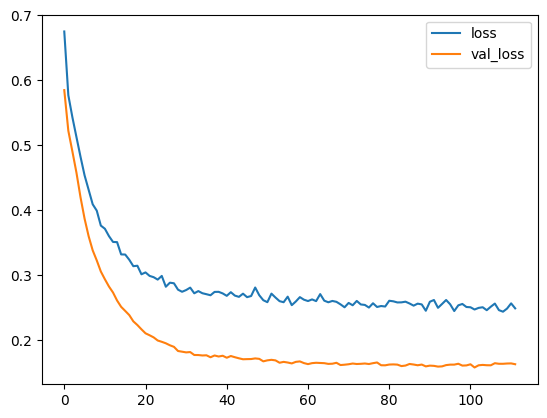

In [87]:
loss_df_with_dropout = pd.DataFrame(model_with_dropout.history.history)
loss_df_with_dropout[['loss', 'val_loss']].plot(legend=True)
plt.show()

Important: Dropout is typically only applied during the training phase and not applied to the validation or test sets.

Dropout is a regularization technique used to prevent overfitting in deep learning models. During training, dropout randomly drops out a certain fraction of neurons from the network, effectively training multiple smaller sub-networks and averaging their predictions to make the final prediction. This helps reduce overfitting by making the model more robust to specific neurons that may be memorizing the training data instead of learning to generalize.

When evaluating the model on the validation or test set, it's important to use the full network without dropout to get an accurate estimate of the model's performance. This is because dropout is a random process, and applying it to the validation or test set would result in different predictions each time, making it difficult to compare the performance of different models.

---
Let's see model performance on test set:

In [88]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9667


[0.11213406175374985, 0.9666666388511658]

In [89]:
model_with_dropout.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9637


[0.16262228786945343, 0.9636666774749756]

# Model Predictions

In [90]:
y_test_probs = model_with_dropout.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [91]:
y_test_probs # need to reshape it.

array([[1.17753014e-01],
       [2.85729311e-05],
       [6.62507300e-05],
       ...,
       [2.72029012e-01],
       [7.91829545e-04],
       [5.70158437e-02]], dtype=float32)

In [92]:
predictions = pd.DataFrame({"y_test":y_test, "y_test_probs":y_test_probs.reshape(-1,)})
predictions['y_test_predictions']= np.where(predictions['y_test_probs']>0.5,1,0)
predictions.head()

,y_test,y_test_probs,y_test_predictions
0,0,0.117753,0
1,0,0.000029,0
2,0,0.000066,0
3,0,0.058942,0
4,0,0.104528,0


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
print(classification_report(y_true= predictions.y_test, y_pred=predictions.y_test_predictions) )

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2274
           1       0.94      0.91      0.92       726

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [97]:
print(confusion_matrix(y_true= predictions.y_test, y_pred=predictions.y_test_predictions) )

[[2229   45]
 [  64  662]]


# Save and load the model

An entire model can be saved in two different file formats (SavedModel and HDF5). The TensorFlow SavedModel format is the default file format in TF2.x. However, models can be saved in HDF5 format. More details: https://www.tensorflow.org/tutorials/keras/save_and_load

since we don't have custom objects here, we will be using the HDF5 format.

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save('my_DNN_classification.h5')
model_with_dropout.save('my_DNN_withDropout_classification.h5')

In [100]:
loaded_model = load_model('my_DNN_classification.h5')
loaded_model_with_Dropout = load_model('my_DNN_withDropout_classification.h5')

In [101]:
loaded_model.summary()

Model: "my_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [102]:
loaded_model.predict(X_test)

94/94 [==============================] - 0s 920us/step


array([[2.8507321e-03],
       [2.6953223e-03],
       [4.2123121e-04],
       ...,
       [4.9794167e-01],
       [2.2633872e-03],
       [1.0688265e-02]], dtype=float32)

In [103]:
loaded_model_with_Dropout.summary()

Model: "my_classification_model_with_Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [104]:
loaded_checkpoint = load_model("model_checkpoint.keras")
loaded_checkpoint.summary()

Model: "my_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                380       
                                                                 
 second_layer (Dense)        (None, 8)                 168       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


---
# Additional Links: 

1. keras optimizers: https://keras.io/api/optimizers/
2. keras loss functions: https://keras.io/api/losses/
3. keras metrics: https://keras.io/api/metrics/
4. Save model: https://www.tensorflow.org/tutorials/keras/save_and_load